Bài viết này được kham khảo từ [machinelearningcoban](https://machinelearningcoban.com/2017/06/15/pca/)

# Thuật toán Gradients descent

## Nhắc lại sơ bộ

Nếu bạn từng học toán ở cấp 3, bạn sẽ quen với hình ảnh này:

<img src="https://github.com/tiepvupsu/tiepvupsu.github.io/blob/master/assets/GD/gradient_descent.png?raw=true" style="position: relative; margin-top: 20px; heigh:450px;width:450px; margin-bottom:20px; left:350px">

Trước khi đi tiếp, hãy thống nhất về các thuật ngữ toán học sau:
- Điểm cực tiểu trên đồ thị hàm số gọi là local minimum
- Điểm mà tại đó hàm số đạt giá trị nhỏ nhất gọi là  Global minimum. 

Global minimum là một trường hợp đặc biệt của local minimum.

Từ đồ thị trên, ta thấy Điểm màu xanh lục là điểm local minimum (cực tiểu), và cũng là điểm làm cho hàm số đạt giá trị nhỏ nhất. Đồng thời, ta cũng đúc kết ra những điều đã quá quen thuộc:
 
- Điểm local minimum x∗ của hàm số là điểm có đạo hàm f′(x∗) = 0. Trong lân cận của nó, đạo hàm của các điểm phía bên trái x∗ là không dương, đạo hàm của các điểm phía bên phải x∗ là không âm.

- Đường tiếp tuyến với đồ thị hàm số đó tại 1 điểm bất kỳ có hệ số góc chính bằng đạo hàm của hàm số tại điểm đó.

- Các điểm bên trái của điểm local minimum có đạo hàm âm, các điểm bên phải có đạo hàm dương. 
- Càng xa về phía trái của điểm local minimum thì đạo hàm càng âm, càng xa về phía phải thì đạo hàm càng dương.




## Đặt vấn đề

Trong các bài toán machine learning liên quan tới Linear Regression, chúng ta đã phải cố gắng tìm giá trị nhỏ nhất của hàm chi phí (cost function) mà đôi khi còn gọi là hàm mất mát (loss function) bằng cách tìm những điểm cực trị (thường là điểm cực tiểu).

Điều này có thể thực hiện bằng cách giải phương trình $f'(x) = 0$

Tuy nhiên phương trình trên không phải lúc nào cũng giải được dễ dàng, có những trường hợp là bất khả thi, ví dụ như $f'(x)=x^2−6sinx$. Vậy khi gặp những tình huống này, chúng ta phải làm gì? May thay, thuật toán Gradient Descent giúp chúng ta tìm được điểm cực tiểu này bằng cách xấp xỉ nó sau một số vòng lặp. 

Gọi là xấp xỉ có nghĩa là ta chỉ tìm được một điểm gần với x* nhất chứ không thể trả về chính xác x*. Trong thực tế, các giá trị dữ liệu không có đúng 100% mà đôi khi chỉ cần những con số gần đúng. Khi một người hỏi tôi, xác suất cho lần đầu tư chứng khoán lần này là 72%, tôi có nên đầu tư không? Thật sự mà nói 72% đã là một con số khá ấn tượng, mọi thứ ngoài đời không bao giờ có 1+1=2 nên những cách tính toán xấp xỉ, gần đúng là một giải pháp tuyệt vời.

## Ý tưởng thuật toán Gradient Descent

Một hướng tiếp cận phổ biến nhất là xuất phát từ một điểm mà chúng ta coi là gần với nghiệm của bài toán, sau đó dùng một phép toán lặp để tiến dần đến điểm cần tìm, tức đến khi đạo hàm gần với 0. 

Điều này giống như tình huống bạn đang ở trên một ngọn núi, bạn muốn xuống được thung lũng một cách nhanh nhất (Ở đây thung lũng chính là những điểm cực tiểu) và cách đơn giản là nhìn xung quanh chỗ nào cảm thấy dốc nhất thì bước xuống từng bước một, cho đến khi bạn không cảm nhận được độ dốc nào nữa thì đấy chính là thung lũng, nơi bằng phẳng và là điểm cực tiểu của đồ thị.

Tuyệt vời phải không, thuật toán Gradient Descent mô tả chính xác những gì bạn đang trải nghiệm ở tình huống trên.

## Gradient Descent cho hàm 1 biến

Như tôi đã nói, để thực thi GD, chúng ta chạy các vòng lặp để liên tục tìm điểm nào đó gần với x* . Hay cùng quan sát lại hình đầu tiên một lần nữa:

<img src="https://github.com/tiepvupsu/tiepvupsu.github.io/blob/master/assets/GD/gradient_descent.png?raw=true" style="position: relative; margin-top: 20px; heigh:450px;width:450px; margin-bottom:20px; left:350px">

Giả sử $x_t$ là điểm ta tìm được sau vòng lặp thứ t. Tại điểm này:

- Nếu $f'(x_t)>0$ thì $x_t$ nằm về bên phải so với $x∗$. Để nó gần với $x∗$ hơn, chúng ta cần di chuyển về phía bên trái, tức về phía âm. Sau khi di chuyển, ta gọi nó là điểm $x_{t+1}$ biểu thị rằng đã thành công cập nhật vị trí sau t vòng lặp. Nói cách khác
$$x_{t+1}=x_t - Δ$$

Với Δ là một con số nào đó chưa biết.

- Ngược lại, nếu $f'(x_t)<0$ thì $x_t$ nằm về bên trái so với $x^∗$. Để nó gần với $x^∗$ hơn, chúng ta cần di chuyển về phía bên phải, tức về phía dương. Tức là
$$x_{t+1}=x_t + Δ$$

Như vậy, Δ có vẻ ngược dấu so với $f'(x_t)$ trong 2 trường hợp trên. Ta nhận ra việc sử dụng giá trị $f'(x_t)$ thay cho Δ để di dời điểm $x_t$ là một giải pháp hợp lý vì cứ mỗi khi $x_t$ vượt qua $x^*$ (dù ở bên trái hay bên phải) thì $f'(x_t)$ sẽ tự động đổi dấu. Ta có
$$x_{t+1}=x_t−ηf'(x_t)$$

trong đó, η (đọc là eta) là một số dương và được gọi là learning rate (tốc độ học). Con số này giúp điều chỉnh lại $f'(x_t)$ nếu $x_t$ di chuyển một khoảng cách quá lớn hay quá nhỏ. Dấu trừ thể hiện việc chúng ta phải đi ngược với đạo hàm (Đây cũng chính là lý do phương pháp này được gọi là Gradient Descent - descent nghĩa là đi ngược).

### Tóm tắt thuật toán
Các bước làm:
1. Khởi tạo $x=x_0$, thường là $x = 1$
2. Tính đạo hàm của hàm mất mát $f(x)$ tại điểm $x_0$, được ký hiệu là $f'(x0)$. Đạo hàm này chính là gradient.
3. Chạy vòng lặp, với mỗi lần lặp, cập nhật giá trị x mới bằng cách trừ đi gradient nhân với learning rate η:
$$x_{t+1}=x_t−ηf'(x_t)$$

Số vòng lặp và giá trị η được lựa chọn tùy ý. 

Chú ý: η thường khá nhỏ nhưng nếu nhỏ quá trớn thì đòi hỏi phải tăng số số vòng lặp lên mới tối ưu được mô hình và ngược lại.

Điều kiện dừng lặp: gradient gần 0 hoặc số vòng lặp tối đa

Lưu ý, thuật toán GD không phải lúc nào cũng đúng cho tất cả các bài toán vì nó phụ thuộc vào nhiều yếu tố như đặc điểm của dữ liệu hay tính chất của hàm mất mát. Nhưng nói chung, nó là công cụ trung gian được sử dụng trong các thuật toán học máy khác phức tạp hơn

### Ví dụ

Giả sử chúng ta muốn tối thiểu hóa hàm $f(x) = x^4 - 3x^3 + 2$, với điểm khởi tạo $x_0 = 2$.

Đầu tiên, chúng ta sẽ định nghĩa hàm mục tiêu và đạo hàm của nó:



Tiếp theo, chúng ta sẽ triển khai thuật toán gradient descent:



Giá trị tối thiểu của hàm: f(2.2499999552819174) = -6.542968749999982
Số vòng lặp:  70


## Gradient Descent cho hàm nhiều biến

Trường hợp này, hàm số của chúng ta sẽ có nhiều hơn một biến, tôi gọi nó là hàm $f(θ)$ trong đó $θ$ (theta) là một vecto chứa nhiều tham số. Để ý thì trong linear regression,  θ chính là $w = (w_1,w_2,...,w_0)$

 Đạo hàm của hàm số $f(θ)$ tại một điểm θ bất kỳ được ký hiệu là $∇_θf(θ)$.  Tương tự như hàm 1 biến, thuật toán GD cho hàm nhiều biến cũng bắt đầu bằng một điểm dự đoán $θ_0$, sau đó, ở vòng lặp thứ t, quy tắc cập nhật là: $θ_{t+1}=θ_t−η×∇_θf(θ_t)$
 

Hoặc viết dưới dạng đơn giản hơn: $$θ = θ−η×∇_θf(θ).$$

Như vậy, về căn bản, dù số lượng biến có tăng lên thì cách tính vẫn không thay đổi. Chỉ có điều, thay vì tính đạo hàm theo một biến duy nhất, ta phải tính đạo hàm riêng theo từng biến và tính gradient cho từng biến đó.

Quy tắc cần nhớ: luôn luôn đi ngược hướng với đạo hàm.

### Ví dụ 1:

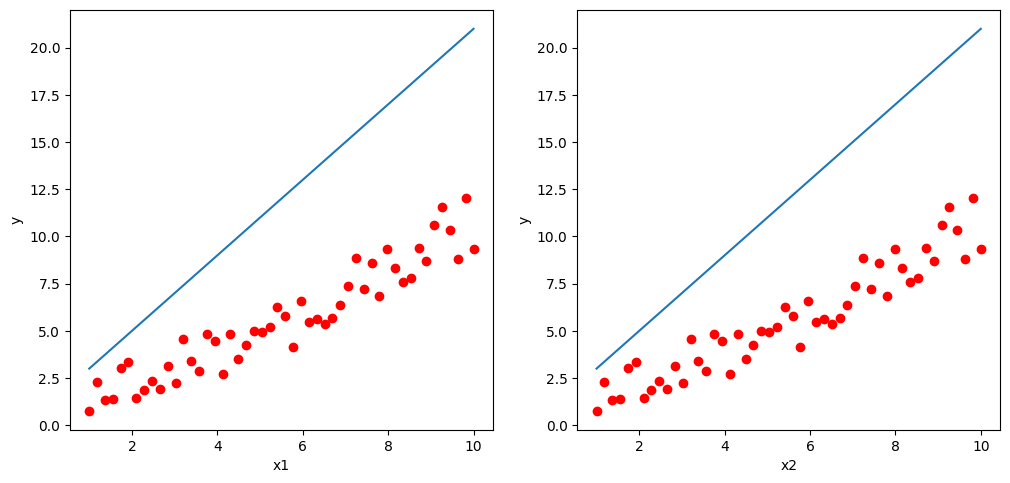

epoch_ 0 :
24.184685177718723  :  inf


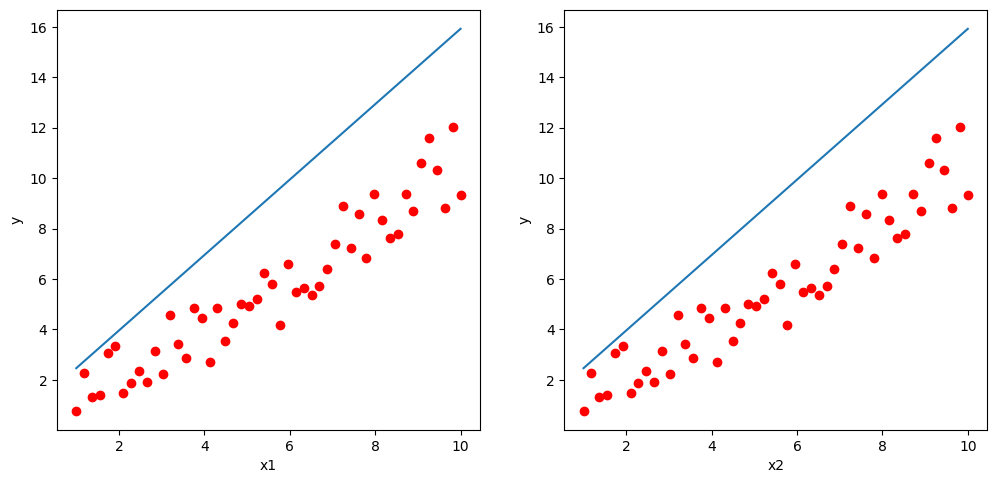

epoch_ 1 :
7.627477514818711  :  24.184685177718723


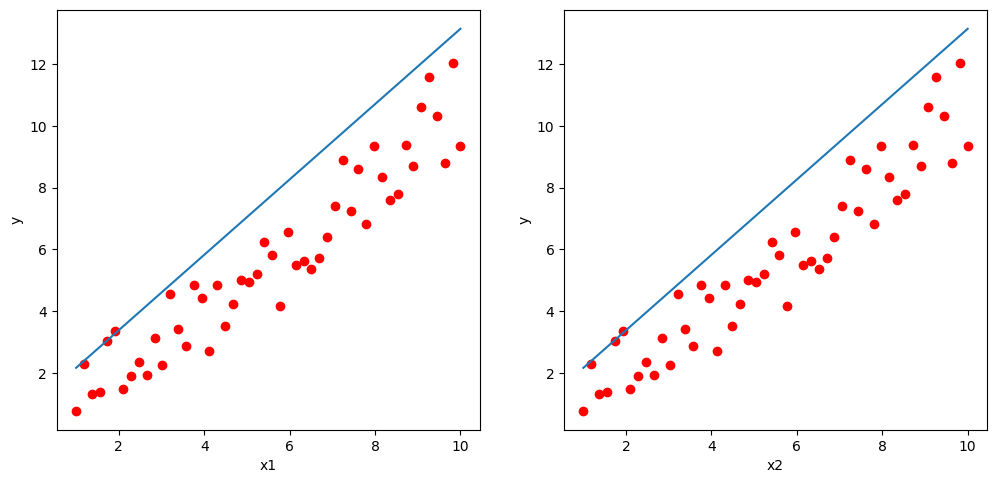

epoch_ 2 :
2.658531395602996  :  7.627477514818711


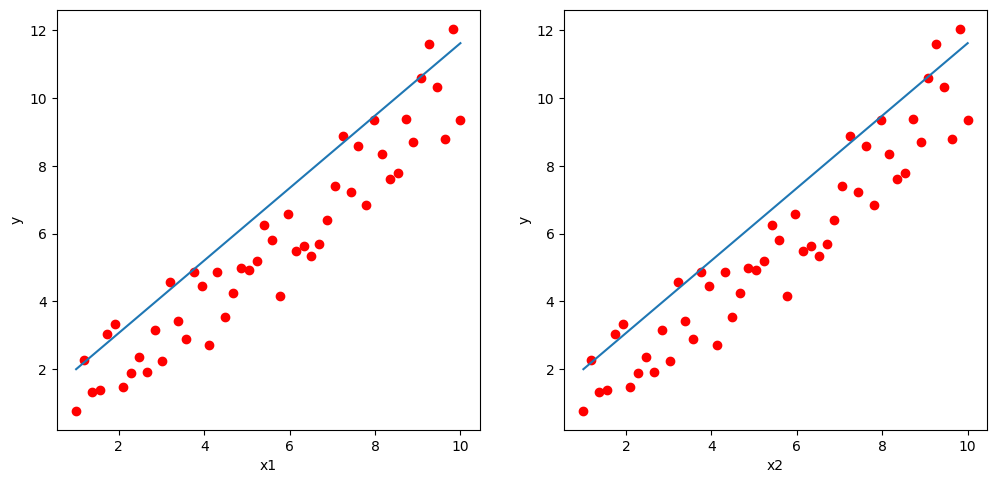

epoch_ 3 :
1.1672062019650835  :  2.658531395602996


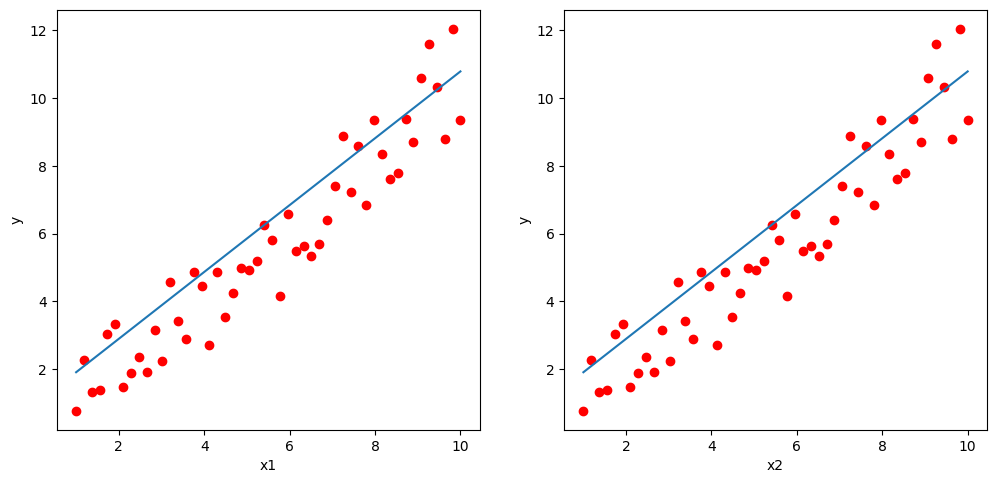

epoch_ 4 :
0.7195103744420023  :  1.1672062019650835


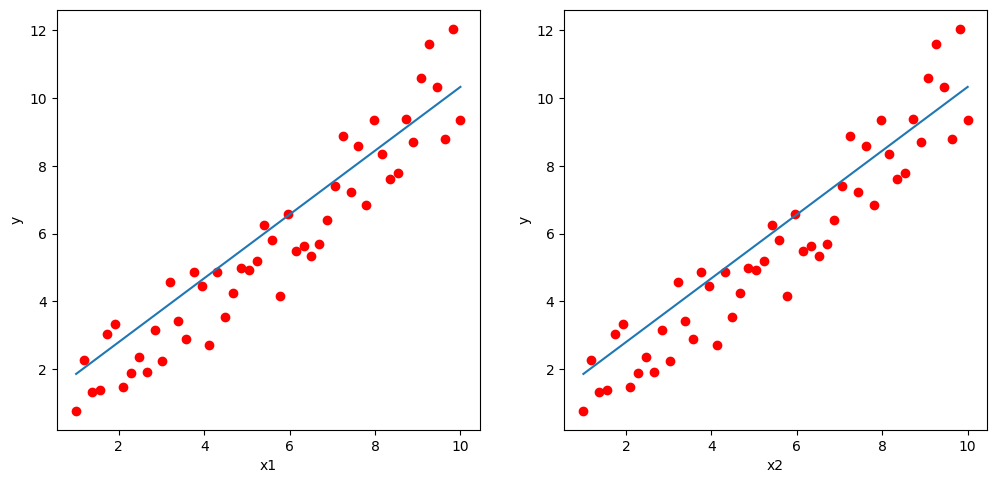

epoch_ 5 :
0.5850065536702178  :  0.7195103744420023


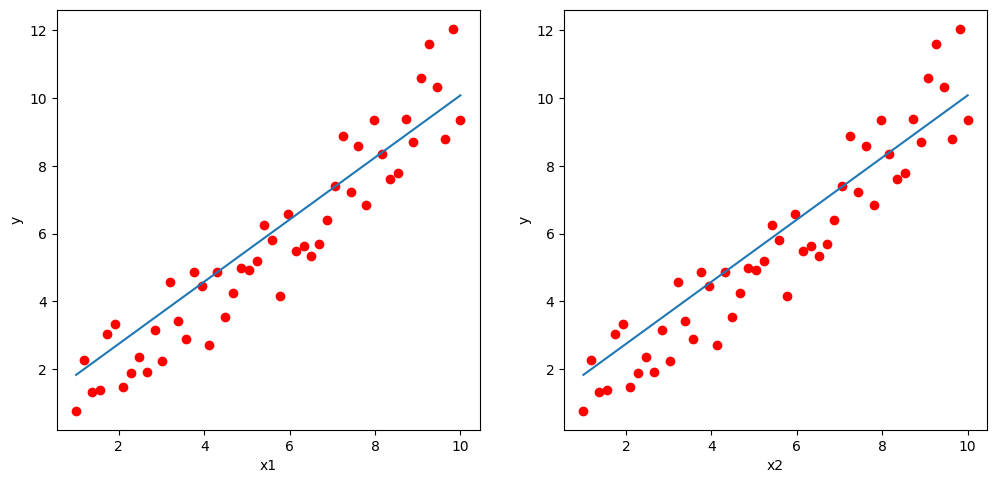

epoch_ 6 :
0.5444915402109274  :  0.5850065536702178


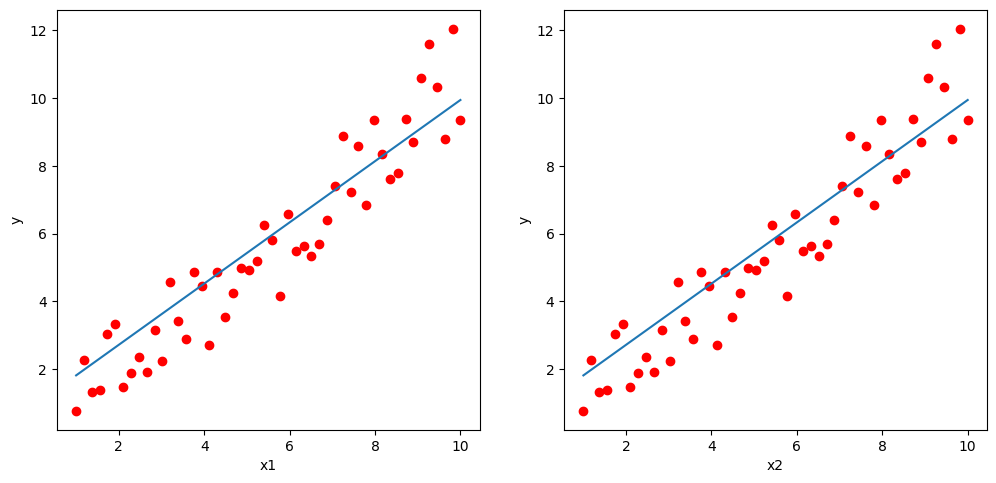

epoch_ 7 :
0.5321827691203789  :  0.5444915402109274


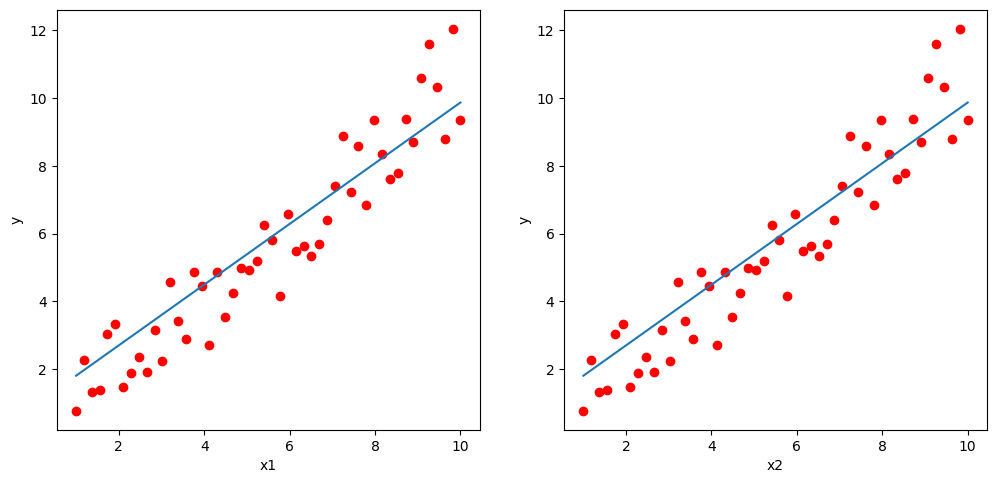

epoch_ 8 :
0.5283389867258268  :  0.5321827691203789


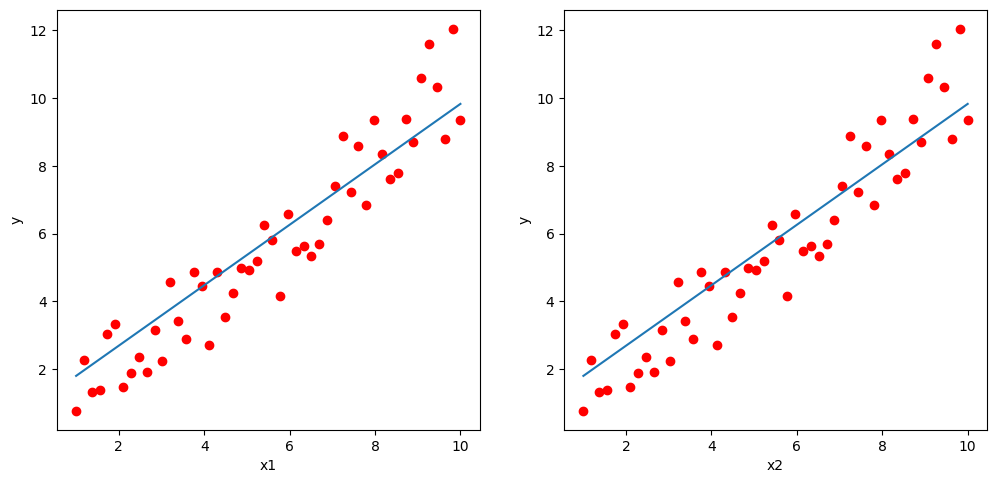

epoch_ 9 :
0.5270358705040501  :  0.5283389867258268


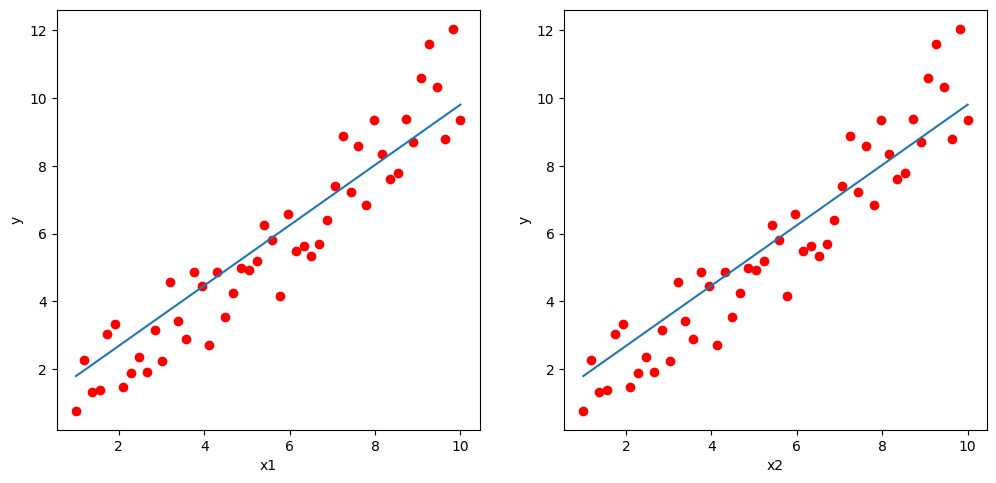

epoch_ 10 :
0.5264955390555631  :  0.5270358705040501


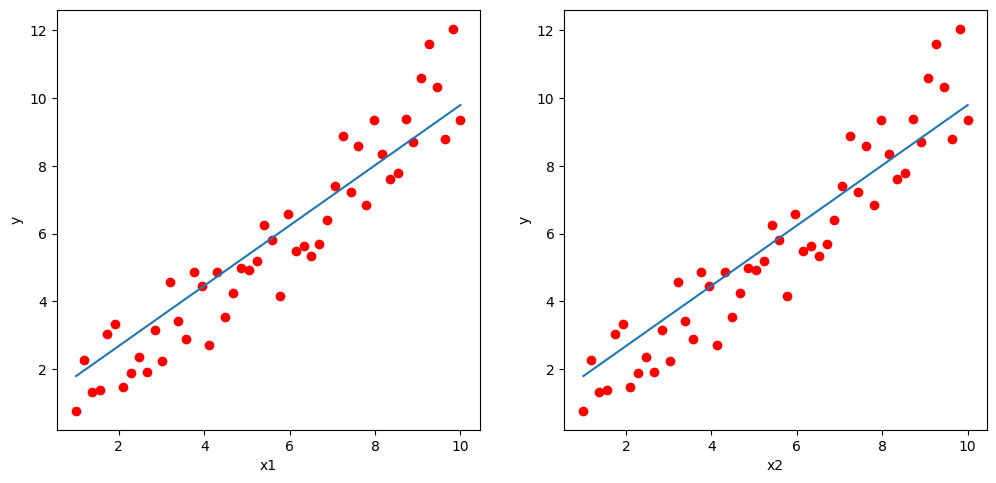

epoch_ 11 :
0.5261844519870512  :  0.5264955390555631


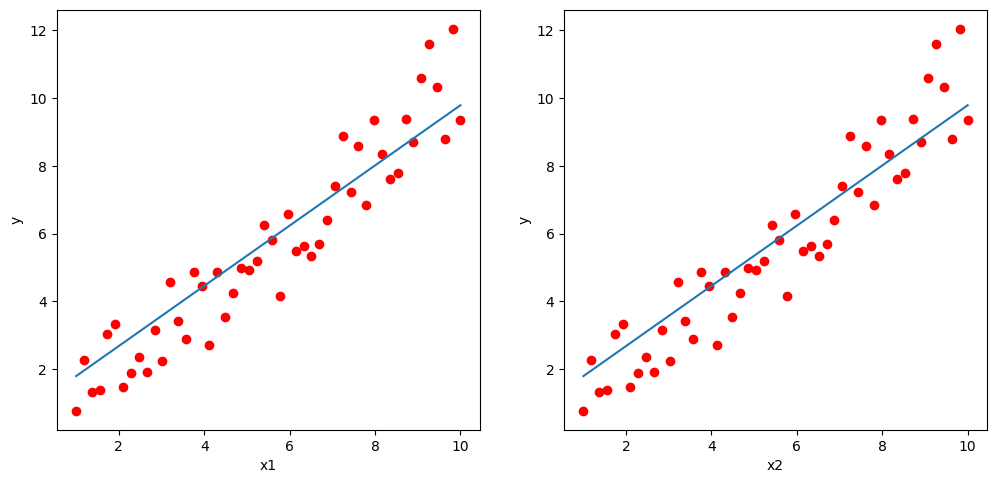

epoch_ 12 :
0.5259424938492135  :  0.5261844519870512


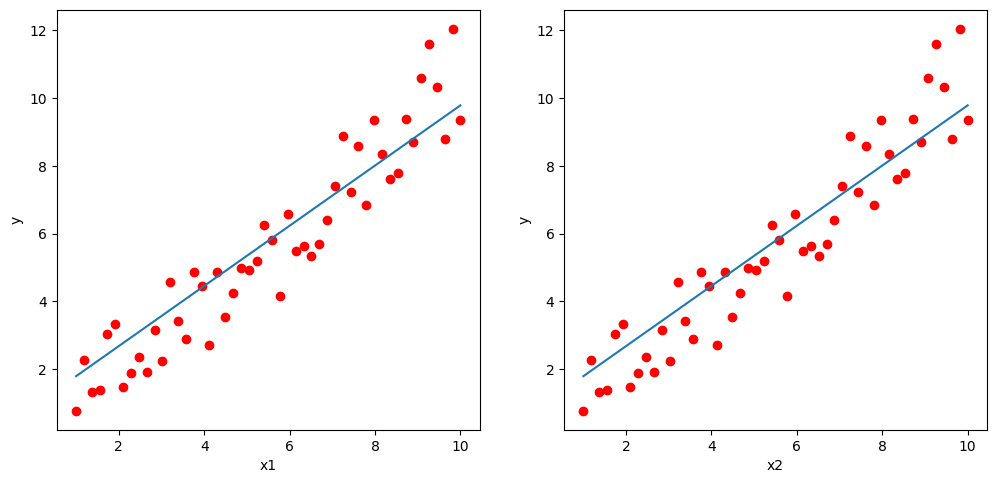

epoch_ 13 :
0.5257216134818566  :  0.5259424938492135


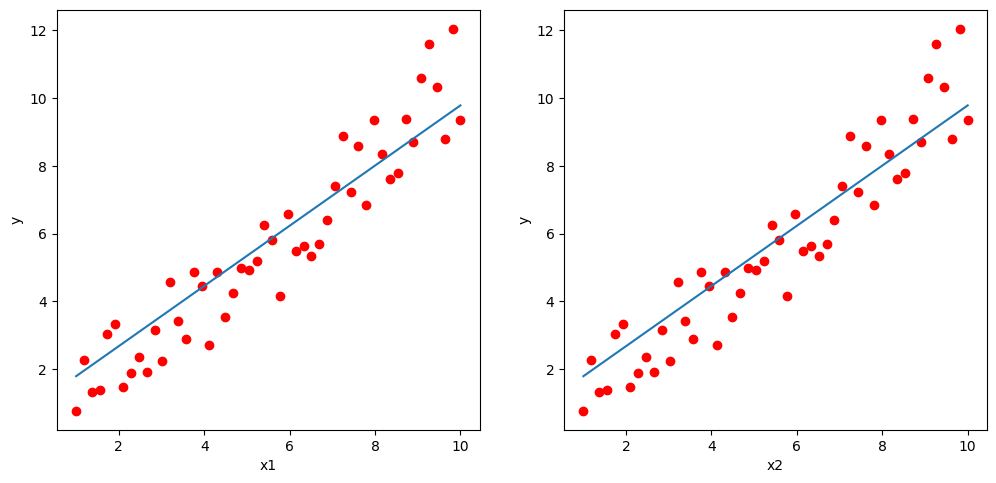

epoch_ 14 :
0.525507390058083  :  0.5257216134818566


In [42]:
import numpy as np
import matplotlib.pyplot as plt

# bài toán regression

# hàm tuyến tính f(x) = w_1*x_1 + w_2*x_2 + w_0
def f(x, w):
    return w[0] + w[1]*x[0] + w[2]*x[1]

# xác định hàm mất mát
# Loss = 1/2​n Σ( y^​ −y)**2 
def loss(x, y, w):
    d = 0
    for i in range(len(x)):
        d += (y[i] - f(x[i],w))**2
    return d / (2 * len(x))

# Tính đạo hàm cho loss
# lưu ý, hàm tuyến tính có nhiều ẩn nên phải là đạo hàm riêng
def gradient(x, y, w):
    d0 = 0
    d1 = 0
    d2 = 0
    for i in range(len(x)):
        d1 += x[i][0] * (f(x[i], w) - y[i]) # gradient by w_1
        d2 += x[i][1] * (f(x[i], w) - y[i]) # gradient by w_2
        d0 += f(x[i], w) - y[i]  # gradient by w_0
    return d0 / len(x), d1 / len(x), d2/len(x)

# Khởi tạo dữ liệu
x1 = np.linspace(start=1, stop=10, num=50).reshape(-1,1)
x2 = np.linspace(start=1, stop=10, num=50).reshape(-1,1)


x = np.hstack((x1,x2))

y = [2 * x[i][0] - 1*x[i][1]+ np.random.normal(0, 1) for i in range(len(x))]

epoch = 15
learning_rate = 0.006
w = [1, 1, 1]  # Initial guess for the model parameters

los_old = float('inf')  # Initialize as infinity

for i in range(epoch):
    
    y_hat =[w[0] + w[1]*x[i][0] + w[2]*x[i][1] for i in range(len(x))]
    
    plt.figure(figsize=(12, 12))
    
    # biểu diễn dữ liệu
    plt.subplot(2, 2, 1)
    plt.plot(x1,y, 'ro')
    plt.plot(x1,y_hat)
    plt.xlabel('x1')
    plt.ylabel('y')
    
    plt.subplot(2,2,2)
    plt.plot(x2,y, 'ro')
    plt.plot(x2,y_hat)
    plt.xlabel('x2')
    plt.ylabel('y')
    
    # vẽ đồ thị của mô hình hiện tại
    

    
    plt.show()

    # chạy GD
    los = loss(x, y, w)
    print("epoch_", i, ':')
    print(los, " : ", los_old)

    # If loss has not decreased significantly, stop the training
    if los > (los_old - 0.0001) and i > 0:
        break
    los_old = los

    # Calculate the gradient and update the weights
    a, b, c = gradient(x, y, w)
    w[0] = w[0] - a * learning_rate
    w[1] = w[1] - b * learning_rate
    w[2] = w[2] - c * learning_rate


## Các biến thể của GD

### Batch GD

Batch GD thực chất thuật toán GD mà tôi đã trình bày ở trên. Về cơ bản, GD là thuật ngữ nói chung chỉ các phương pháp cập nhật trọng số bằng cách giảm dần gradient nên thật khó nói GD sẽ được trình bày thế nào. Do vậy, tôi đã "lén" mượn ý tưởng của BGD từ đầu mà không nói trước để trình bày cho các bạn hiểu. Mà thôi, suy cho cùng thì BGD là thuật toán đầu tiên và cơ bản nhất khi nhắc tới GD.

Trong đoạn code triển khai, tại hàm gradient, tôi đã thêm một vòng lặp duyệt qua toàn bộ dữ liệu nhằm giúp loss function được tính đạo hàm tại tất cả các điểm dữ liệu. 

Vì vậy, hãy nhớ rằng, nguyên tắc của BGD là: Duyệt qua toàn bộ dữ liệu, tính gradient, rồi mới cập nhật trọng số

Giờ tôi sẽ thêm ví dụ nữa cho các bạn thấy:

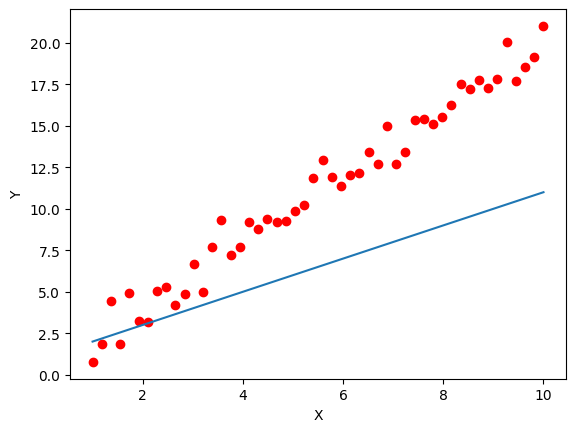

epoch_ 0 :
14.059599321554352  :  inf


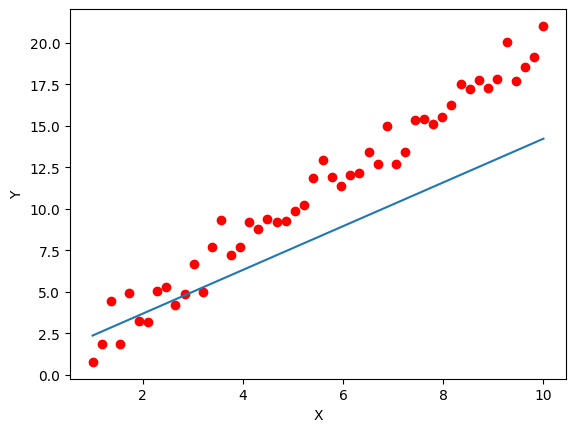

epoch_ 1 :
5.70282906066599  :  14.059599321554352


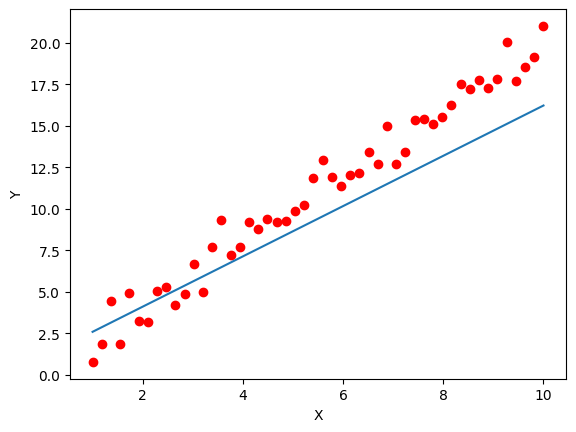

epoch_ 2 :
2.4996511136964887  :  5.70282906066599


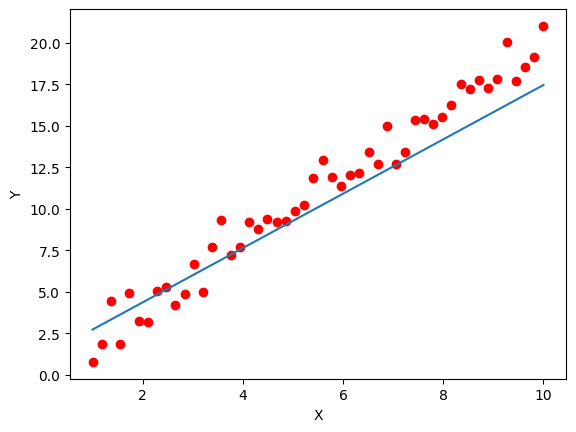

epoch_ 3 :
1.2716994939703685  :  2.4996511136964887


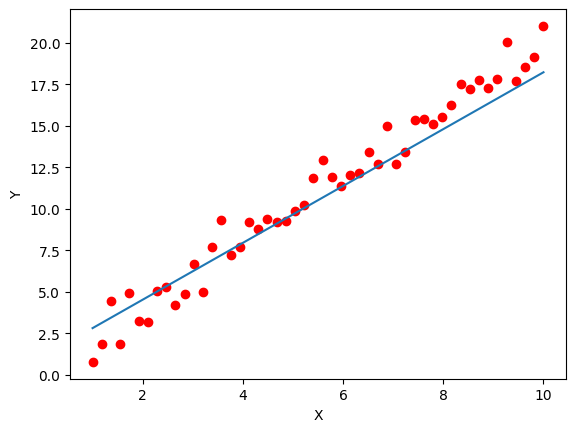

epoch_ 4 :
0.8007969186222975  :  1.2716994939703685


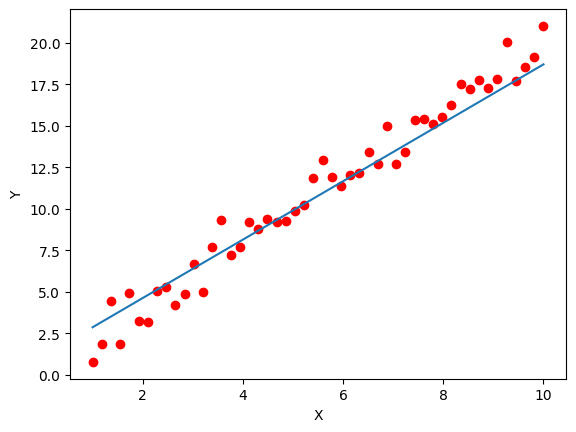

epoch_ 5 :
0.620050680601148  :  0.8007969186222975


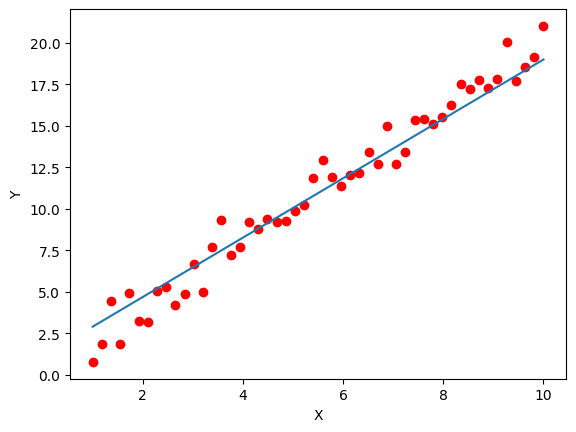

epoch_ 6 :
0.5505140817146297  :  0.620050680601148


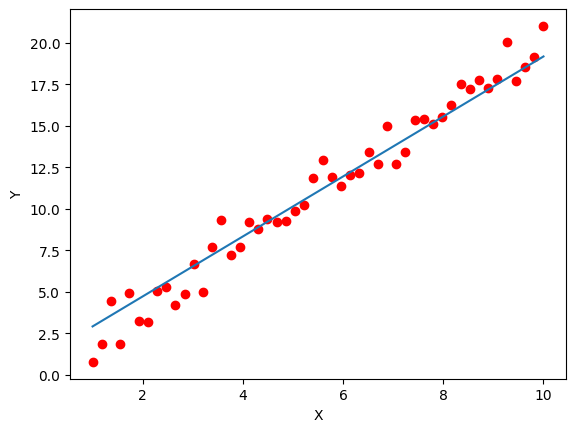

epoch_ 7 :
0.52360193882482  :  0.5505140817146297


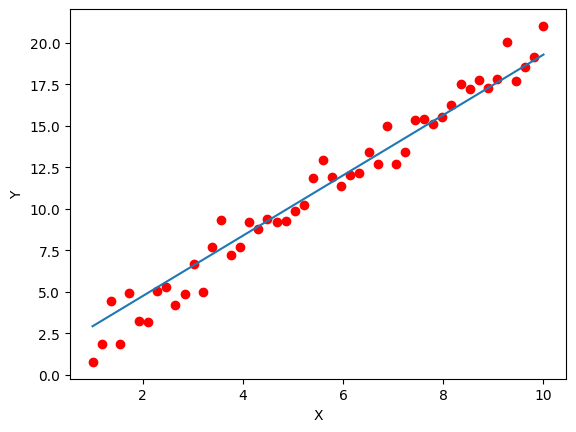

epoch_ 8 :
0.5130274984740477  :  0.52360193882482


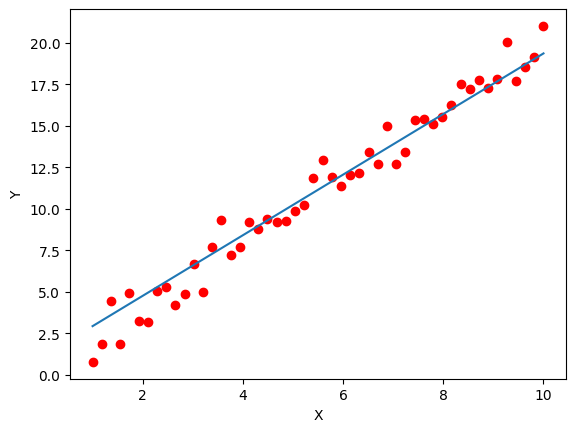

epoch_ 9 :
0.5087157922043651  :  0.5130274984740477


In [25]:
import numpy as np
import matplotlib.pyplot as plt

# bài toán li
# hàm tuyến tính f(x) = w_1*x_1 + w_0
def f(x, w):
    return w[0] + w[1] * x

# gradient for loss function
# # Loss = 1/2​n Σ( y^​ −y)**2 
def loss(x, y, w):
    d = 0
    for i in range(len(x)):
        d += (y[i] - (w[0] + w[1] * x[i]))**2
    return d / (2 * len(x))

def gradient(x, y, w):
    d0 = 0
    d1 = 0
    for i in range(len(x)):
        d1 += x[i] * (f(x[i], w) - y[i]) # gradient by w_1
        d0 += f(x[i], w) - y[i]  # gradient by w_0
    return d0 / len(x), d1 / len(x)

# Assuming x and y are defined as numpy arrays of the same length
x = np.linspace(start=1, stop=10, num=50)
y = 2 * x + np.random.normal(0, 1, 50)  # Example linear data with some noise

epoch = 10
learning_rate = 0.01
w = [1, 1]  # Initial guess for the model parameters
los_old = float('inf')  # Initialize as infinity

for i in range(epoch):
    # Plot the data points
    plt.plot(x, y, 'ro')
    plt.xlabel('X')
    plt.ylabel('Y')

    # Plot the current model
    x0 = np.linspace(start=1, stop=10, num=50) #(0, 10)
    y0 = w[0] + w[1] * x0
    plt.plot(x0, y0)
    plt.show()

    # Update parameters
    los = loss(x, y, w)
    print("epoch_", i, ':')
    print(los, " : ", los_old)

    # If loss has not decreased significantly, stop the training
    if los > (los_old - 0.0001) and i > 0:
        break
    los_old = los

    # Calculate the gradient and update the weights
    a, b = gradient(x, y, w)
    w[0] = w[0] - a * learning_rate
    w[1] = w[1] - b * learning_rate

### Stochastic GD

Khác với batch gradient descent, Stohastic (SGD) không tính gradient tại toàn bộ dữ liệu mà chỉ tính gradient tại một điểm rồi dùng gradient đó để cập nhật trọng số. Do đó, Hàm khởi tạo gradient sẽ không có vòng lặp.

Ngoài ta, nếu như BGD sử dụng một loss function duy nhất là MSE thì SGD sẽ sử dụng tới 2 loss function. Trong đó, hàm MSE dùng để kiểm tra xem thuật toán có còn sai sót hay không, còn trong quá trình cập nhật trọng số thì thuật toán sẽ dùng một hàm khác: $$ L = \frac{1}{2} (\hat{y} - y)^2$$

<!-- Trông rất giống mất mát tại một điểm dữ liệu phải ko ? Đúng vậy, với hàm nà -->

Do vậy, nguyên tắc Của SGD là: Với một điểm dữ liệu, chỉ tính một gradient, rồi dùng gradient đó cập nhật trọng số, sau đó kiểm tra xem MSE tính trên bộ dữ liệu tổng thể có giảm hay không, làm điều tương tự cho các điểm còn lại. 

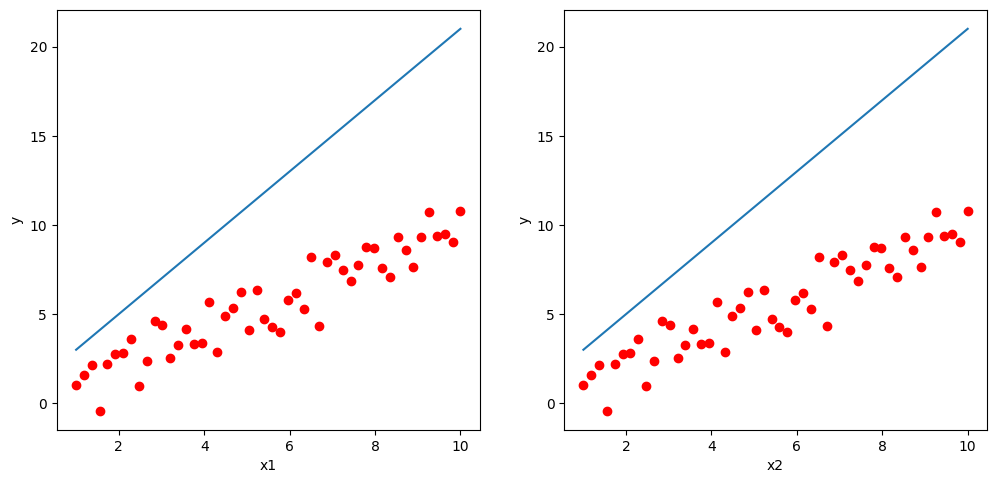

Epoch 0:
Loss: 24.94327915561498 (previous: inf)


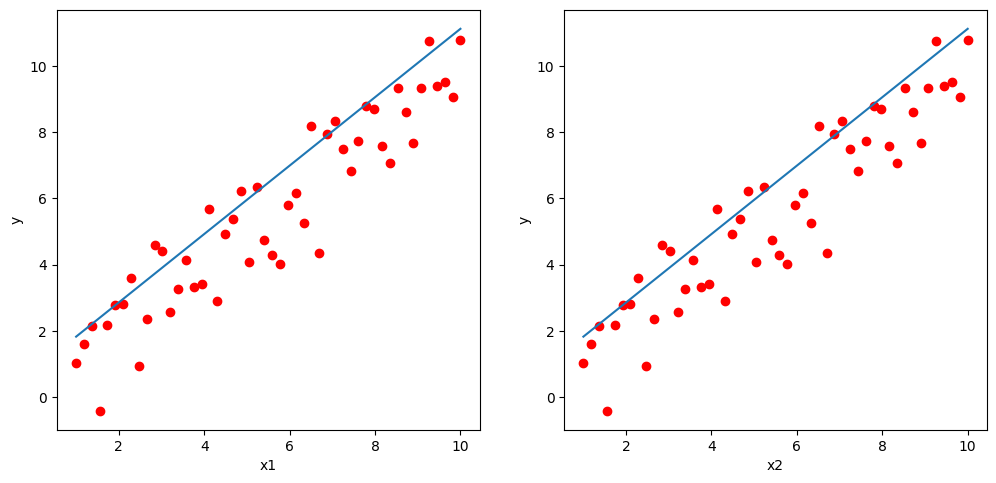

Epoch 1:
Loss: 0.9523435979926728 (previous: 24.94327915561498)


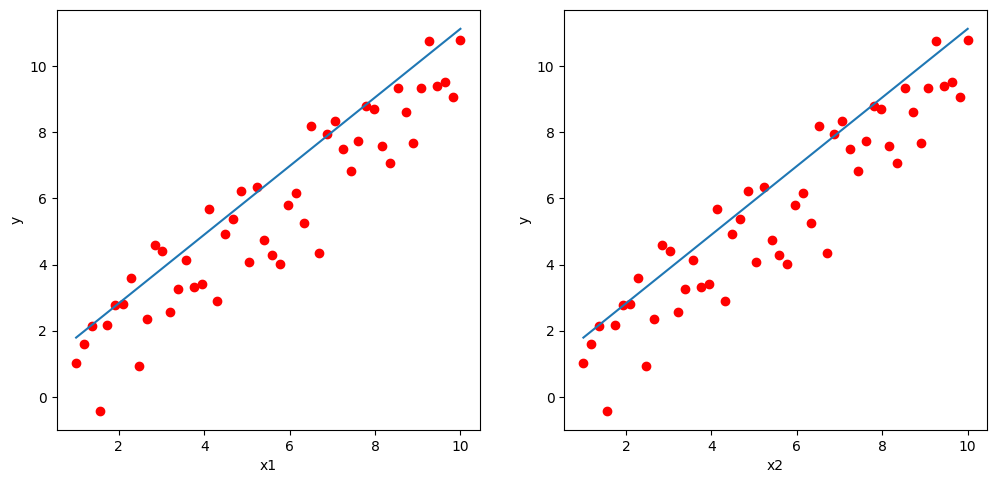

Epoch 2:
Loss: 0.9404215206666293 (previous: 0.9523435979926728)


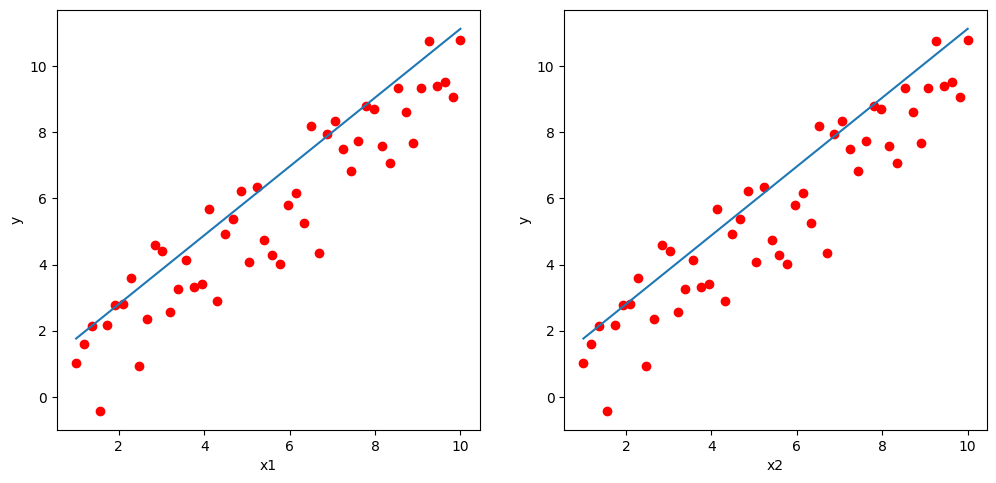

Epoch 3:
Loss: 0.92913289573342 (previous: 0.9404215206666293)


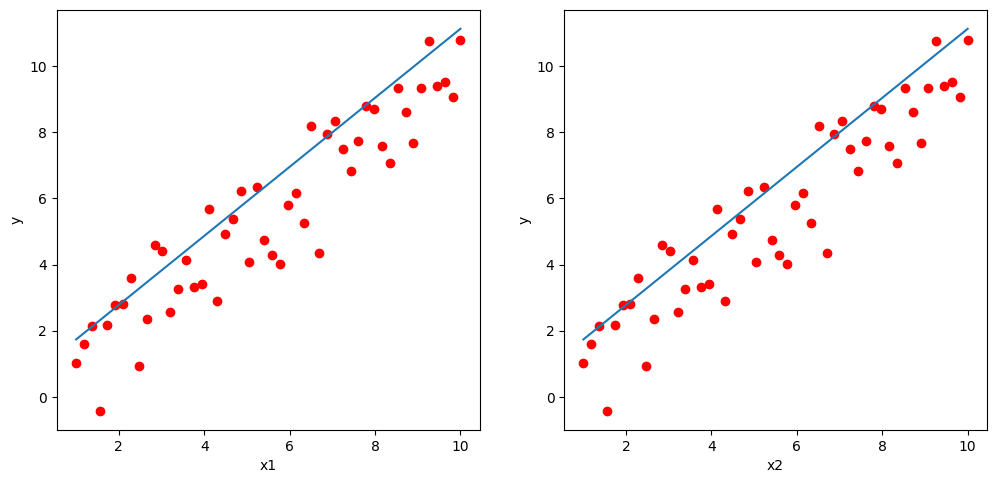

Epoch 4:
Loss: 0.918442289230436 (previous: 0.92913289573342)


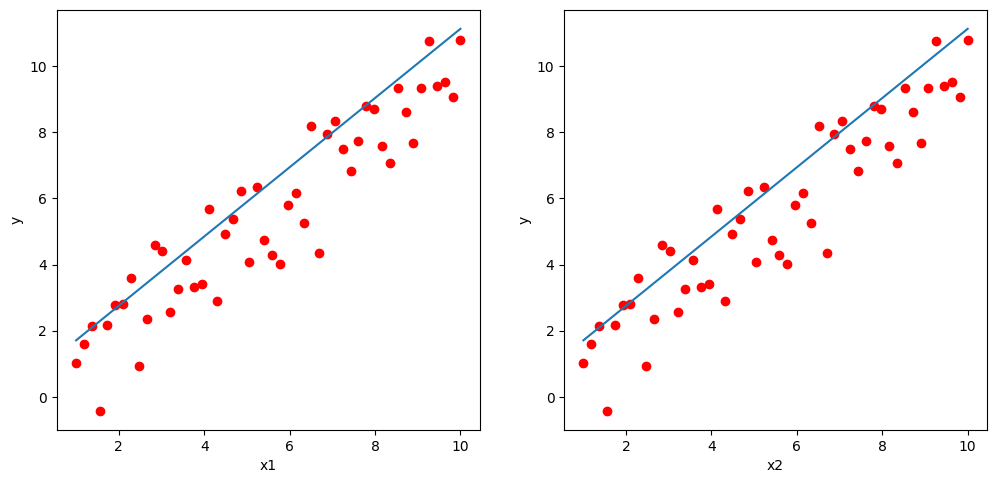

Epoch 5:
Loss: 0.9083163097199664 (previous: 0.918442289230436)


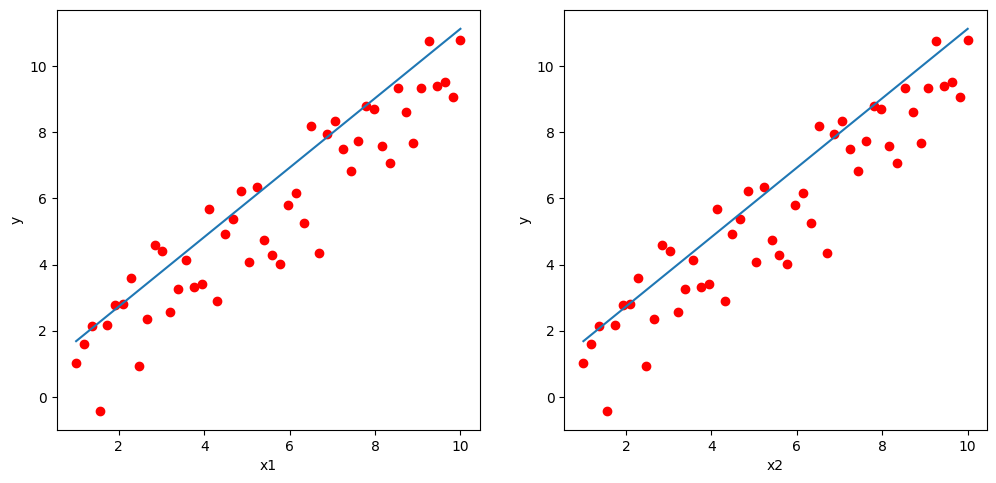

Epoch 6:
Loss: 0.8987234885998925 (previous: 0.9083163097199664)


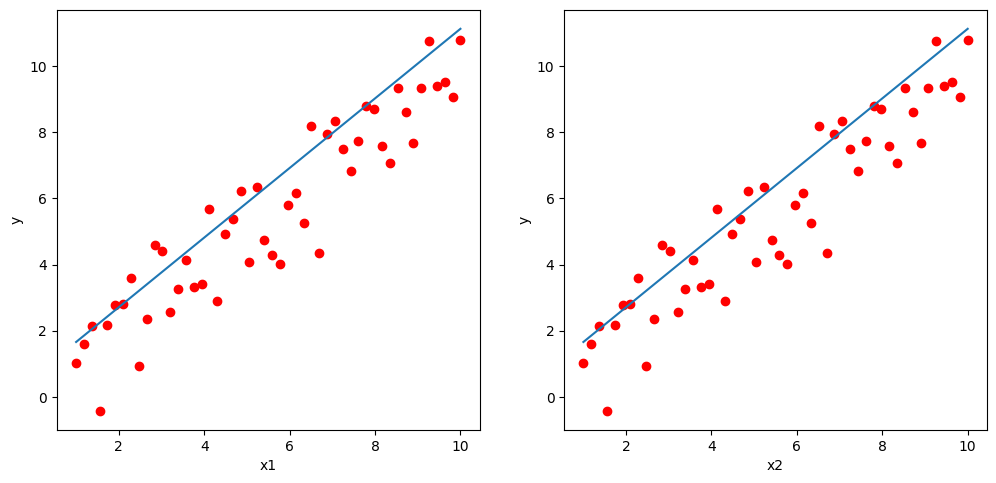

Epoch 7:
Loss: 0.8896341674891639 (previous: 0.8987234885998925)


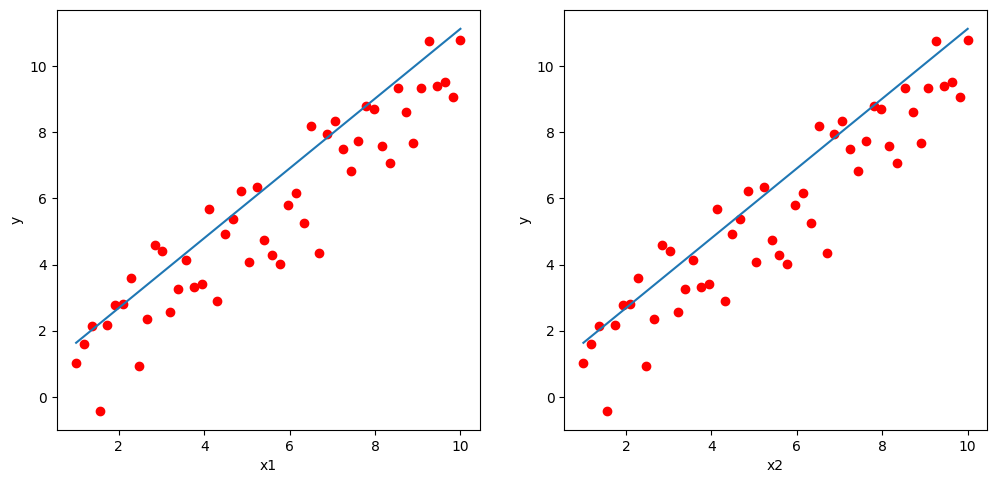

Epoch 8:
Loss: 0.8810203922680607 (previous: 0.8896341674891639)


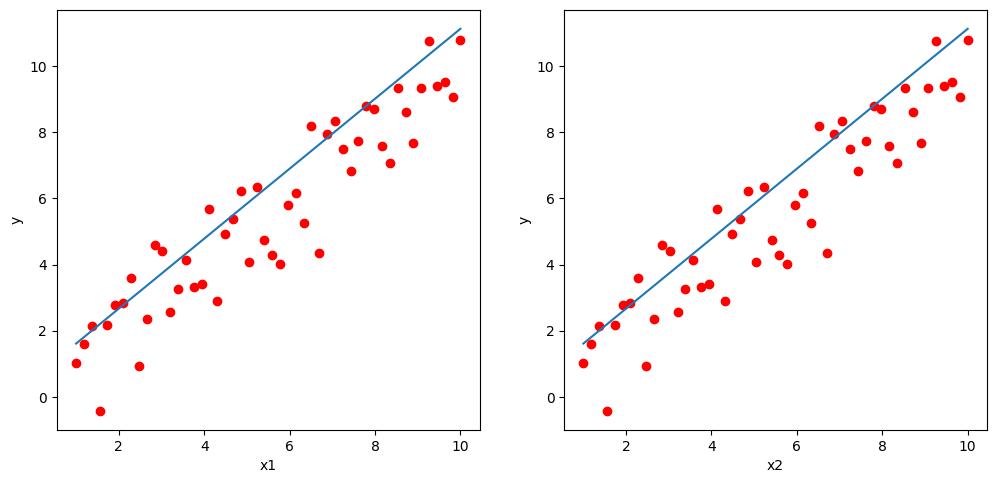

Epoch 9:
Loss: 0.8728558133780759 (previous: 0.8810203922680607)


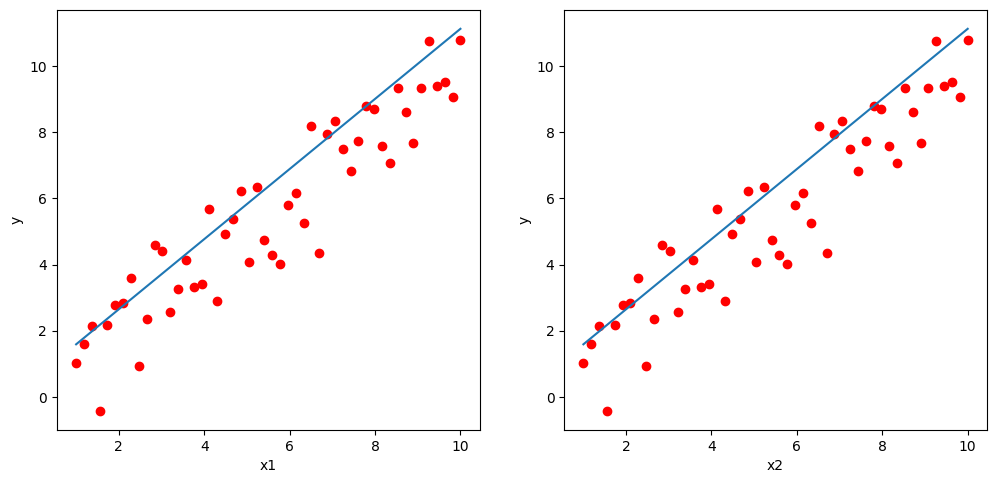

Epoch 10:
Loss: 0.8651155920099285 (previous: 0.8728558133780759)


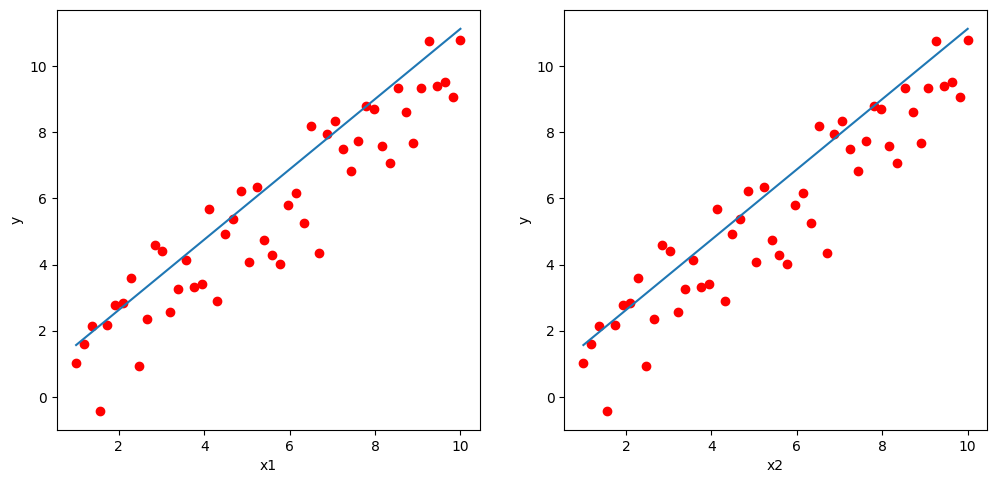

Epoch 11:
Loss: 0.8577763118301805 (previous: 0.8651155920099285)


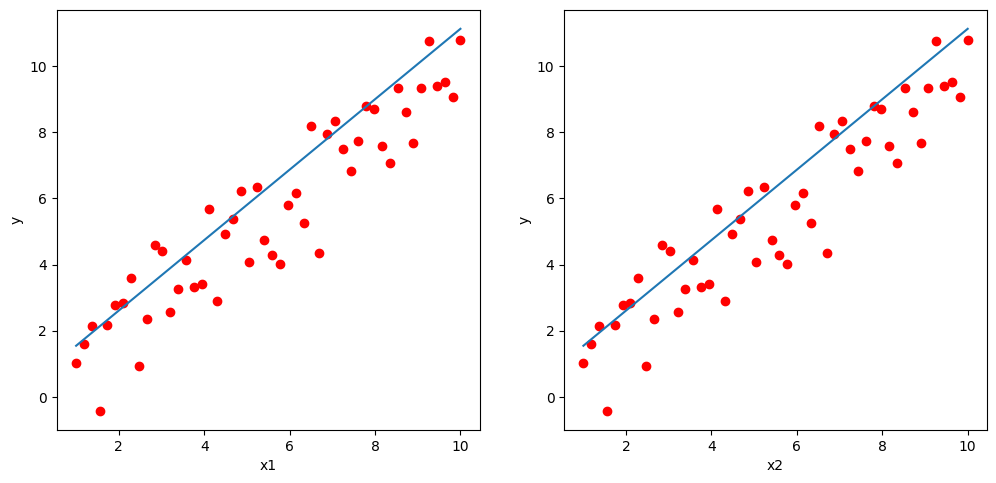

Epoch 12:
Loss: 0.8508158959178626 (previous: 0.8577763118301805)


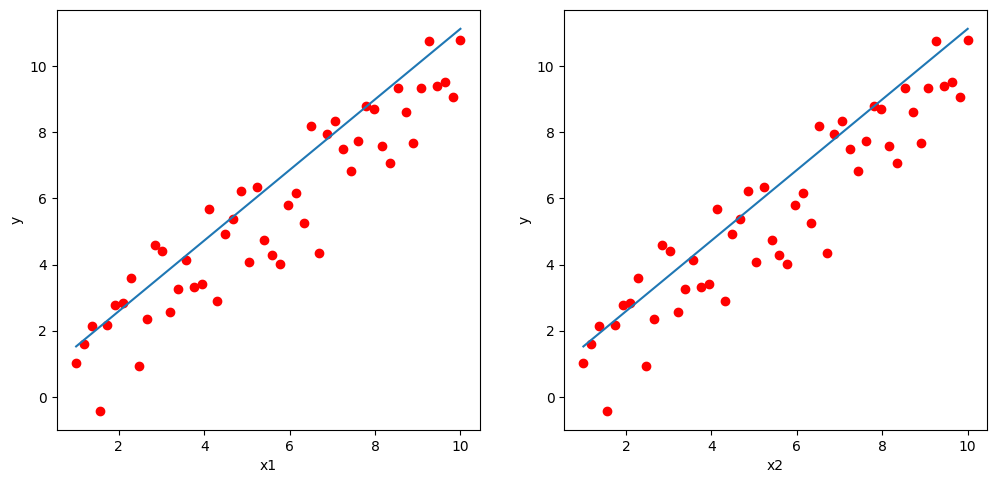

Epoch 13:
Loss: 0.8442135286019419 (previous: 0.8508158959178626)


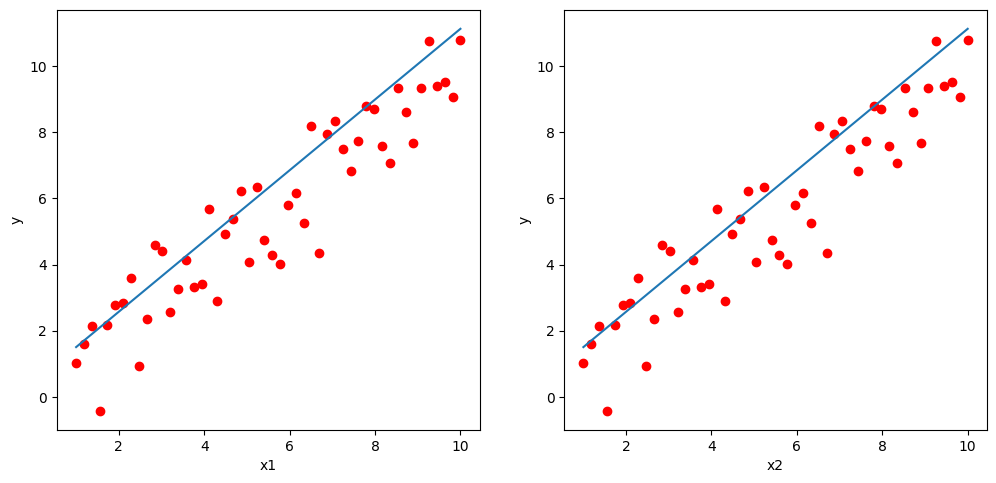

Epoch 14:
Loss: 0.8379495819089476 (previous: 0.8442135286019419)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Bài toán regression

# Hàm tuyến tính f(x) = w_1*x_1 + w_2*x_2 + w_0
def f(x, w):
    return w[0] + w[1]*x[0] + w[2]*x[1]

# Xác định hàm mất mát      
# Loss = 1/2 Σ (y_hat - y)^2 
def loss(x, y, w):
    d = 0
    for i in range(len(x)):
        d += (y[i] - f(x[i], w))**2
    return d / (2 * len(x))

# Tính đạo hàm cho loss
# Hàm tuyến tính có nhiều ẩn nên phải là đạo hàm riêng
def derivative(x, y, w):
    d0 = f(x, w) - y  # derivative by w_0
    d1 = x[0] * (f(x, w) - y)  # derivative by w_1
    d2 = x[1] * (f(x, w) - y)  # derivative by w_2
    return d0, d1, d2

# Khởi tạo dữ liệu
x2 = np.linspace(start=1, stop=10, num=50).reshape(-1, 1)

x = np.hstack((x1, x2))

# Dữ liệu y với một số nhiễu ngẫu nhiên
y = [2 * x[i][0] - 1 * x[i][1] + np.random.normal(0, 1) for i in range(len(x))]

epoch = 15
learning_rate = 0.006
w = [1, 1, 1]  # Khởi tạo tham số mô hình

los_old = float('inf')  # Khởi tạo giá trị mất mát cũ là vô cùng

for i in range(epoch):
    plt.figure(figsize=(12, 12))
    
    # Biểu diễn dữ liệu
    plt.subplot(2, 2, 1)
    plt.plot(x1, y, 'ro')
    y_hat = [f(x[j], w) for j in range(len(x))]
    plt.plot(x1, y_hat)
    plt.xlabel('x1')
    plt.ylabel('y')
    
    plt.subplot(2, 2, 2)
    plt.plot(x2, y, 'ro')
    plt.plot(x2, y_hat)
    plt.xlabel('x2')
    plt.ylabel('y')
    
    # Vẽ đồ thị của mô hình hiện tại
    plt.show()
    
    los = loss(x, y, w)
    print(f"Epoch {i}:")
    print(f"Loss: {los} (previous: {los_old})")

    # Nếu mất mát không giảm đáng kể, dừng huấn luyện
    if los > (los_old - 0.0001) and i > 0:
        break
    los_old = los

    # Chạy GD (Stochastic Gradient Descent)
    for j in range(len(x)):
        a, b, c = derivative(x[j], y[j], w)
        w[0] = w[0] - a * learning_rate
        w[1] = w[1] - b * learning_rate
        w[2] = w[2] - c * learning_rate


Source: 
[machinelearningcoban](https://machinelearningcoban.com/2017/01/12/gradientdescent/)

[javatpoint](https://www.javatpoint.com/gradient-descent-in-machine-learning)